In [1]:
import numpy as np
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from importlib.resources import path
from PIL import Image



Original_Image = cv.imread('Flower.jpg')
Gray_Image = cv.imread('Flower.jpg', 0)
cv.imshow('Grayscale', Gray_Image)
cv.imshow('Original', Original_Image)
cv.waitKey(0) 


# Obtain number of rows and columns of the image
r, c = Gray_Image.shape


In [2]:
def add_gauusian_noise(img,mue,sigma):
    
    noise = np.random.normal(mue,sigma,size = (img.shape[0],img.shape[1]))
    new_image = np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_image[i][j] = img[i][j] + int(noise[i][j])

    return new_image

#############################################################
def add_uniform_noise(img,low,high):
    
    noise = np.random.uniform(low,high,size = (img.shape[0],img.shape[1]))
    new_image = np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_image[i][j] = img[i][j] + int(noise[i][j])

    return new_image

#############################################################
def add_sp_noise(img,percent_salt,percent_pepper):
    
    num_salt = int(percent_salt * img.shape[0] +percent_salt *img.shape[1])
    num_pepper = int(percent_pepper * img.shape[0] +percent_pepper *img.shape[1])
    for i in range(num_salt):
        index_x = np.random.randint(0,img.shape[0]-1)
        index_y = np.random.randint(0,img.shape[1]-1)
        img[index_x][index_y] = 255
    for i in range(num_pepper):
        index_x = np.random.randint(0,img.shape[0]-1)
        index_y = np.random.randint(0,img.shape[1]-1)
        img[index_x][index_y] = 0

    return img


#############################################################
def get_Histogram(gray_img):
    values = [0]*256
    for i in range(gray_img.shape[0]):
        for j in range(gray_img.shape[1]):
            values[gray_img[i,j]] += 1
    return values


#############################################################
def Min_Max(Gray_Image:np.ndarray):
    maximum=0
    minimum=255
    for i in range(Gray_Image.shape[0]):
        for j in range(Gray_Image.shape[1]):
            if Gray_Image[i][j] <= minimum :
                minimum = Gray_Image[i][j]
            elif Gray_Image[i][j] >= maximum :
                maximum = Gray_Image[i][j]
    return minimum,maximum


#############################################################
def Normalization(Gray_Image:np.ndarray):
    minimum,maximum =Min_Max(Gray_Image)
    for i in range (Gray_Image.shape[0]):
        for j in range (Gray_Image.shape[1]):
            Gray_Image[i][j] = (Gray_Image[i][j]-minimum)*(255/(maximum-minimum))
    return Gray_Image


#############################################################
def Averaging_Filter (img , K_Size):

    # Develop Averaging filter(K, K) mask
    Kernal = np.ones([K_Size, K_Size], dtype = int)
    Kernal = Kernal / (K_Size*K_Size)

    img_new = conv(img , Kernal)
    # print(img_new)

    img_new = img_new.astype(np.uint8)

    return img_new


#############################################################
def Median_Filter (img):

    # Traverse the image. For every 3X3 area,
    # find the median of the pixels and replace the center pixel by the median
    img_new = np.zeros([r, c])
    for i in range(1, r-1):
        for j in range(1, c-1):
            temp = [img[i-1, j-1],
                img[i-1, j],
                img[i-1, j + 1],
                img[i, j-1],
                img[i, j],
                img[i, j + 1],
                img[i + 1, j-1],
                img[i + 1, j],
                img[i + 1, j + 1]]

            temp = sorted(temp)
            img_new[i, j]= temp[4]

    img_new = img_new.astype(np.uint8)

    return img_new


#############################################################
def gaussian_Filter(img , k_Size, sigma):
    kernel = gaussian_kernel(k_Size, sigma)
    img_gaus = conv(img , kernel)
    # print(img_gaus)
    img_gaus = img_gaus.astype(np.uint8)

    return img_gaus


#############################################################
def gaussian_kernel(k_Size,sigma):

    if k_Size == 3:
        # guassian Kernal 3x3
        Kernal = np.array([[1,2,1],
                        [4,8,4],
                        [1,2,1]], dtype=float)
        Kernal /= 16.0
    else:
        # guassian Kernal 5x5
        Kernal = np.array([[1,4,7,4,1],
                        [4,16,26,16,4],
                        [7,26,41,26,7],
                        [4,16,26,16,4],
                        [1,4,7,4,1]], dtype=float)
        Kernal /= 256.0

    row, col = Kernal.shape

    for i in range (row):
        for j in range (col):
            Kernal[i,j] = Gaussian_Function(Kernal[i,j], 0, sigma)

    return Kernal


#############################################################
def Gaussian_Function(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)


#############################################################
def conv(img , mask):

    img_conv = np.zeros([r, c])

    for i in range(1, r-1):
        for j in range(1, c-1):
            temp = img[i-1, j-1]*mask[0, 0] + img[i-1, j]*mask[0, 1] + img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]

            img_conv[i, j]= temp
    return img_conv


#############################################################
def Equalize_image(input_image):
    img = Image.open(input_image)


    imgray = img.convert(mode='L')


    img_array = np.asarray(imgray) 

    histogram_array = np.bincount(img_array.flatten(), minlength=256)
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels

   
    cumulative_histo_array = np.cumsum(histogram_array)

    transform_map = np.floor(255 * cumulative_histo_array).astype(np.uint8)

    img_list = list(img_array.flatten())

    eq_img_list = [transform_map[p] for p in img_list]

    new_image = np.reshape(np.asarray(eq_img_list), img_array.shape)

    return new_image


#############################################################
def get_cumulative(Color_array):
    Cmv_array = [0]*256
    Cmv_array[0] = Color_array[0] 
    for i in range(1 , 256):
        Cmv_array[i] = Cmv_array[i-1] + Color_array[i]
    return Cmv_array


#############################################################
def Outso(image, step):
    
    All_colors = image.flatten()
    Total_Weight = len(All_colors)
    Least_var = -1
    Least_var_threshold = -1
    
    # create an array of all possible threshold values which we want to loop through
    color_thresholds = np.arange(np.min(image)+step, np.max(image)-step, step)
    print (color_thresholds)
    # loop through the thresholds to find the one with the least within class variance
    for color_threshold in color_thresholds:
        bg_pixels = All_colors[All_colors < color_threshold]
        weight_bg = len(bg_pixels) / Total_Weight
        variance_bg = np.var(bg_pixels)

        fg_pixels = All_colors[All_colors >= color_threshold]
        weight_fg = len(fg_pixels) / Total_Weight
        variance_fg = np.var(fg_pixels)

        within_class_variance = weight_fg*variance_fg + weight_bg*variance_bg
        if Least_var == -1 or Least_var > within_class_variance:
            Least_var = within_class_variance
            Least_var_threshold = color_threshold
        # print("trace:", within_class_variance, color_threshold)
            
    return Least_var_threshold


#############################################################
def local_threshold(input_img):

    h, w = input_img.shape

    S = w/8
    s2 = S/2
    T = 15.0

    #integral img
    int_img = np.zeros_like(input_img, dtype=np.uint32)
    for col in range(w):
        for row in range(h):
            int_img[row,col] = input_img[0:row,0:col].sum()

    #output img
    output_img = np.zeros_like(input_img)    

    for col in range(w):
        for row in range(h):
            #SxS region
            y0 = int(max(row-s2, 0))
            y1 = int(min(row+s2, h-1))
            x0 = int(max(col-s2, 0))
            x1 = int(min(col+s2, w-1))

            count = (y1-y0)*(x1-x0)

            sum_ = int_img[y1, x1]-int_img[y0, x1]-int_img[y1, x0]+int_img[y0, x0]

            if input_img[row, col]*count < sum_*(100.-T)/100.:
                output_img[row,col] = 255
            else:
                output_img[row,col] = 0

    return output_img


#############################################################
def Globale_Thresholding (img , value):
    r, c = img.shape
    img_thre = np.zeros([r, c])

    for i in range (0,r):
        for j in range (0,c):
            if img[i,j] >= value:
                img_thre[i,j] = 255
            else:
                img_thre[i,j] = 0

    return img_thre


#############################################################
def get_fft(img):
    fft = np.fft.fft2(img)
    fft_shifted = np.fft.fftshift(fft)
    
    return fft_shifted


#############################################################
def add_low_pass(img,pass_percent):
    fft_shifted = np.asarray(get_fft(img))
    filter = np.zeros((fft_shifted.shape),dtype=np.uint8)
    start_x = int(0+((img.shape[0]-pass_percent*img.shape[0])/2.0))
    stop_x = int(img.shape[0]-((img.shape[0]-pass_percent*img.shape[0])/2.0))
    start_y = int(0+((img.shape[1]-pass_percent*img.shape[1])/2.0))
    stop_y = int(img.shape[1]-((img.shape[1]-pass_percent*img.shape[1])/2.0))
    filter[start_x:stop_x,start_y:stop_y] = np.ones((stop_x-start_x,stop_y-start_y), dtype=np.uint8)
    filtered_img = fft_shifted * filter
    filtered_img = np.fft.ifftshift(filtered_img)
    filtered_img = np.fft.ifft2(filtered_img)
    filtered_img = np.abs(filtered_img).clip(0,255).astype(np.uint8)

    
    return filtered_img


#############################################################
def add_high_pass(img,pass_percent):
    fft_shifted = np.asarray(get_fft(img))
    filter = np.ones((fft_shifted.shape),dtype=np.uint8)
    start_x = int(0+((img.shape[0]-pass_percent*img.shape[0])/2.0))
    stop_x = int(img.shape[0]-((img.shape[0]-pass_percent*img.shape[0])/2.0))
    start_y = int(0+((img.shape[1]-pass_percent*img.shape[1])/2.0))
    stop_y = int(img.shape[1]-((img.shape[1]-pass_percent*img.shape[1])/2.0))
    filter[start_x:stop_x,start_y:stop_y] = np.zeros((stop_x-start_x,stop_y-start_y), dtype=np.uint8)
    filtered_img = fft_shifted * filter
    filtered_img = np.fft.ifftshift(filtered_img)
    filtered_img = np.fft.ifft2(filtered_img)
    filtered_img = np.abs(filtered_img).clip(0,255).astype(np.uint8)

    
    cv.waitKey(0)
    return filtered_img


#############################################################
def hybrid(img1,img2):
    img = img1+img2
    return img
    

In [4]:
#Adding gauusian noise  "point 1 p1"
Resulted_Image = add_gauusian_noise(Gray_Image,200,10)
cv.imshow('Gaussian_noise',Resulted_Image)
cv.waitKey(0) 


-1

In [5]:
#Adding uniform noise   "point 1 p2"
Resulted_Image = add_uniform_noise(Gray_Image,150,255)
cv.imshow('Uniform_noise',Resulted_Image)
cv.waitKey(0) 

-1

In [6]:
#Adding salt & pepper noise   "point 1 p3"
Resulted_Image = add_sp_noise(Gray_Image,0.2,0.1)
cv.imshow('sp_noise',Resulted_Image)
cv.waitKey(0) 

-1

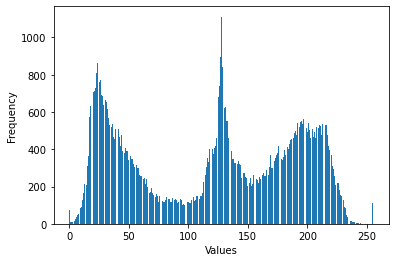

In [7]:
#Plotting Histogram     "point 4 p1"
x = np.linspace(0, 255, num=256)
results = get_Histogram(Gray_Image)
plt.bar(x,results)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

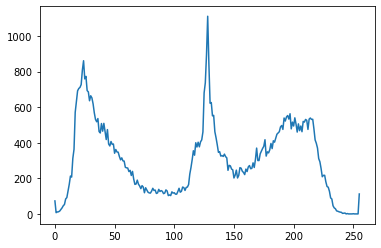

In [8]:
#Plotting Distribution Curve  "point 4 p2"
plt.plot(x,results)

In [9]:
#Normalizing Image    "point 6"
Norm_image = Normalization(Gray_Image)
cv.imshow('Normalized_image' , Norm_image)
cv.waitKey(0)

-1

In [10]:
#Applying Gaussian Filter  "point 2 p1"
img_gaus = gaussian_Filter(Gray_Image , 3 , 2.0)
cv.imshow('Gaussian_Filter.png', img_gaus)
cv.waitKey(0)

-1

In [12]:
#Applying Median Filter  "point 2 p2"
img_med = Median_Filter(Gray_Image)
cv.imshow('Median_Filter.png', img_med)
cv.waitKey(0)

-1

In [13]:
#Applying Average Filter  "point 2 p3"
img_avrg = Averaging_Filter(Gray_Image , 3)
cv.imshow('Gaussian_Filter.png', img_avrg)
cv.waitKey(0)

-1

In [14]:
#Equalizing Image  "point 5"
Equal_image = Equalize_image('Flower.jpg')
cv.imshow('Equalized_image' , Equal_image)
cv.waitKey(0)

-1

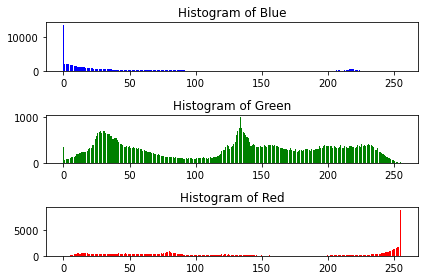

In [16]:
#Drawing RGB Histogram   "point 8 p1"

x = np.linspace(0, 255, num=256)

# Get BGR data from image
Blue = get_Histogram(Original_Image[:,:,0])
Green = get_Histogram(Original_Image[:,:,1])
Red = get_Histogram(Original_Image[:,:,2])



# Separate histograms for each color
plt.subplot(3, 1, 1)
plt.title("Histogram of Blue")
plt.bar(x, Blue, color="blue")

plt.subplot(3, 1, 2)
plt.title("Histogram of Green")
plt.bar(x, Green, color="green")

plt.subplot(3, 1, 3)
plt.title("Histogram of Red")
plt.bar(x, Red, color="red")

plt.tight_layout()
plt.show()

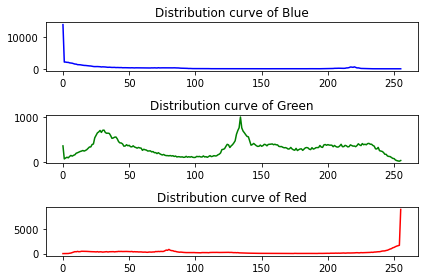

In [17]:
#Drawing RGB Distribution curve   "point 8 p2"
x = np.linspace(0, 255, num=256)   

# Get BGR data from image
Blue = get_Histogram(Original_Image[:,:,0])
Green = get_Histogram(Original_Image[:,:,1])
Red = get_Histogram(Original_Image[:,:,2])

#Separate distribution Curves for each color
plt.subplot(3, 1, 1)
plt.title("Distribution curve of Blue")
plt.plot(x, Blue, color="blue")

plt.subplot(3, 1, 2)
plt.title("Distribution curve of Green")
plt.plot(x, Green, color="green")

plt.subplot(3, 1, 3)
plt.title("Distribution curve of Red")
plt.plot(x, Red, color="red")

plt.tight_layout()
plt.show()

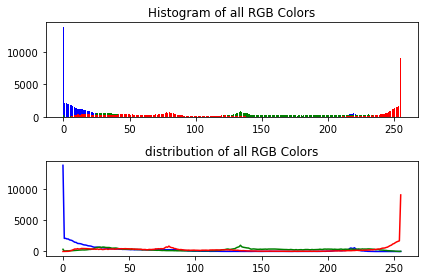

In [18]:
#Drawing RGB Histogram & distribution curve of all colors combined   "point 8 p3"
 
x = np.linspace(0, 255, num=256)

# Get BGR data from image
Blue = get_Histogram(Original_Image[:,:,0])
Green = get_Histogram(Original_Image[:,:,1])
Red = get_Histogram(Original_Image[:,:,2])

# combined histogram
plt.subplot(2, 1, 1)
plt.title("Histogram of all RGB Colors")
plt.bar(x, Blue, color="blue")
plt.bar(x, Green, color="green")
plt.bar(x, Red, color="red")

plt.subplot(2, 1, 2)
plt.title("distribution of all RGB Colors")
plt.plot(x, Blue, color="blue")
plt.plot(x, Green, color="green")
plt.plot(x, Red, color="red")

plt.tight_layout()
plt.show()

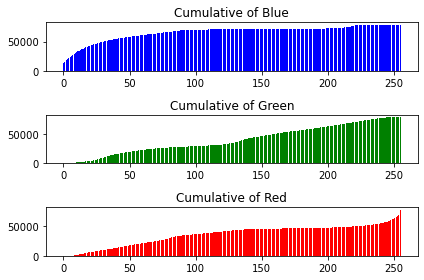

In [20]:
#Drawing Cumulative distribution Curve   "point 8 p4"

x = np.linspace(0, 255, num=256)   

# Get BGR data from image
Blue = get_Histogram(Original_Image[:,:,0])
Cmv_Blue = get_cumulative(Blue) 
Green = get_Histogram(Original_Image[:,:,1])
Cmv_Green = get_cumulative(Green) 
Red = get_Histogram(Original_Image[:,:,2])
Cmv_Red = get_cumulative(Red) 


# Separate histograms for each color
plt.subplot(3, 1, 1)
plt.title("Cumulative of Blue")
plt.bar(x, Cmv_Blue, color="blue")

plt.subplot(3, 1, 2)
plt.title("Cumulative of Green")
plt.bar(x, Cmv_Green, color="green")

plt.subplot(3, 1, 3)
plt.title("Cumulative of Red")
plt.bar(x, Cmv_Red, color="red")

plt.tight_layout()
plt.show()

In [21]:
dog = cv.imread("./dog.jpg",0)
cat = cv.imread("./cat.jpg",0)

img1 = add_low_pass(cat,0.07)
img2 = add_high_pass(dog,0.07)
hybridimg = hybrid(img1,img2)
cv.imshow('./low_filtered_img.jpg', img1)
cv.waitKey(0)
cv.imshow('./high_filtered_img.jpg', img2)
cv.waitKey(0)
cv.imshow('./hybrid.jpg',hybridimg)
cv.waitKey(0)

-1

In [23]:
Outso_result = Outso(Gray_Image, 0.1)
Global_img = Globale_Thresholding (Gray_Image , Outso_result)
print (Outso_result)
cv.imshow('output.png' , Global_img)
cv.waitKey(0)


[1.000e-01 2.000e-01 3.000e-01 ... 2.546e+02 2.547e+02 2.548e+02]
106.1


-1

In [25]:
Local_img = local_threshold(Gray_Image)
cv.imshow('output_2.png' , Local_img)
cv.waitKey(0)

C:\Users\Tarek\AppData\Local\Temp/ipykernel_18236/2322263711.py:261: RuntimeWarning: overflow encountered in ulong_scalars
  sum_ = int_img[y1, x1]-int_img[y0, x1]-int_img[y1, x0]+int_img[y0, x0]


-1